In [248]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [249]:
data_set = pd.read_csv('rating.csv')
names = data_set.loc[:,'Name']
df = data_set.loc[:,['age in days','contract expiry','position','market_value_in_eur']]
minimun, maximun, difference = df.min(), df.max(), df.max()-df.min()
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df['Rating'] = data_set.loc[:,'Rating'] 
dftrain = normalized_df.iloc[:100,:]
dfeval = normalized_df.iloc[100:,:]
y_train = dftrain.pop('market_value_in_eur')
y_eval = dfeval.pop('market_value_in_eur')

In [250]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [251]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [252]:
dnn_model = build_and_compile_model()

In [253]:
history = dnn_model.fit(
    dftrain,
    y_train,
    validation_split=0.1,
    verbose=0, epochs=30)

In [254]:
test_results = {}

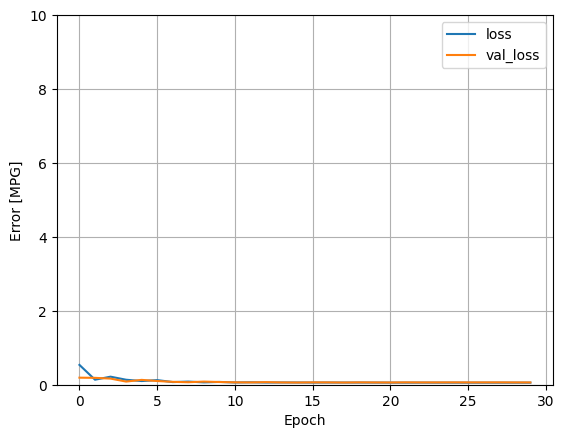

In [255]:
plot_loss(history)

In [256]:
test_results['dnn_model'] = dnn_model.evaluate(dfeval, y_eval, verbose=0)

In [257]:
test_results

{'dnn_model': 0.06220337003469467}

33/33 [==============================] - 0s 864us/step


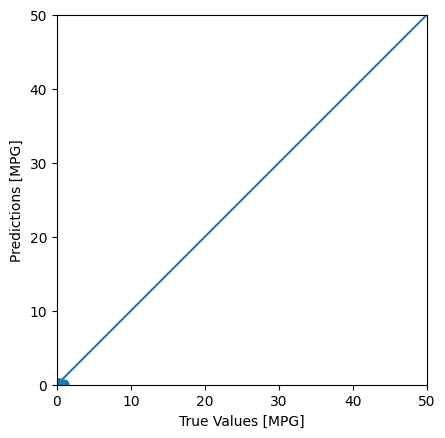

In [258]:
test_predictions = dnn_model.predict(dfeval).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_eval, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [259]:
difference = difference.loc['market_value_in_eur']
minimun = minimun.loc['market_value_in_eur']
real_prediciton = test_predictions * difference + minimun
y_eval = y_eval * difference + minimun

In [260]:
difference = abs((pd.Series(y_eval) - real_prediciton)//1000000)

In [261]:
difference.sum()

11772.0

In [262]:
pd.DataFrame({'name':names.iloc[100:].tolist(),'results':y_eval,"predictions":real_prediciton.tolist(),'difference':difference.tolist()}).to_csv('Predictions.csv')